In [83]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

In [84]:
# Import Weather Datset
weather_data = pd.read_csv('data\input\wundergound.csv')
weather_data

,Date,Time,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Precip,Condition
0,2022-01-01,11:15:00,33,28,82,NNE,21.0,31.0,29.17,0.0,Light Snow / Windy
1,2022-01-01,11:29:00,32,27,82,NNE,22.0,31.0,29.17,0.0,Light Snow / Windy
2,2022-01-01,11:53:00,32,27,82,NNE,21.0,33.0,29.18,0.0,Light Snow / Windy
3,2022-01-01,12:00:00,32,28,85,NNE,22.0,31.0,29.18,0.0,Light Snow / Windy
4,2022-01-01,12:10:00,32,28,85,NNE,21.0,29.0,29.17,0.0,Light Snow / Windy
...,...,...,...,...,...,...,...,...,...,...,...
10189,2022-12-31,13:53:00,37,30,76,SE,9.0,18.0,29.23,0.0,Cloudy
10190,2022-12-31,14:53:00,37,31,79,SE,10.0,NaN,29.21,0.0,Cloudy
10191,2022-12-31,15:53:00,37,32,82,CALM,0.0,NaN,29.22,0.0,Cloudy
10192,2022-12-31,16:53:00,37,32,82,SE,6.0,NaN,29.22,0.0,Cloudy


In [85]:
#attribute types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10194 non-null  object 
 1   Time         10194 non-null  object 
 2   Temperature  10194 non-null  int64  
 3   Dew Point    10194 non-null  int64  
 4   Humidity     10194 non-null  int64  
 5   Wind         10188 non-null  object 
 6   Wind Speed   10188 non-null  float64
 7   Wind Gust    2732 non-null   float64
 8   Pressure     10194 non-null  float64
 9   Precip       10194 non-null  float64
 10  Condition    10194 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 876.2+ KB


In [86]:
# Kombiniere "Date" und "Time" und speichere das Ergebnis in der Spalte "DateTime"
weather_data['DateTime'] = pd.to_datetime(weather_data['Date'] + ' ' + weather_data['Time'], format='%Y-%m-%d %H:%M:%S')

# Setze den Index des DataFrames auf die Spalte "DateTime"
weather_data_indexed_by_date = weather_data.set_index('DateTime')

# Ausgabe des aktualisierten DataFrame mit der neuen Spalte
print(weather_data)

             Date      Time  Temperature  Dew Point  Humidity  Wind  \
0      2022-01-01  11:15:00           33         28        82   NNE   
1      2022-01-01  11:29:00           32         27        82   NNE   
2      2022-01-01  11:53:00           32         27        82   NNE   
3      2022-01-01  12:00:00           32         28        85   NNE   
4      2022-01-01  12:10:00           32         28        85   NNE   
...           ...       ...          ...        ...       ...   ...   
10189  2022-12-31  13:53:00           37         30        76    SE   
10190  2022-12-31  14:53:00           37         31        79    SE   
10191  2022-12-31  15:53:00           37         32        82  CALM   
10192  2022-12-31  16:53:00           37         32        82    SE   
10193  2022-12-31  17:53:00           37         32        82   ESE   

       Wind Speed  Wind Gust  Pressure  Precip           Condition  \
0            21.0       31.0     29.17     0.0  Light Snow / Windy   
1      

In [87]:
#attribute types
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         10194 non-null  object        
 1   Time         10194 non-null  object        
 2   Temperature  10194 non-null  int64         
 3   Dew Point    10194 non-null  int64         
 4   Humidity     10194 non-null  int64         
 5   Wind         10188 non-null  object        
 6   Wind Speed   10188 non-null  float64       
 7   Wind Gust    2732 non-null   float64       
 8   Pressure     10194 non-null  float64       
 9   Precip       10194 non-null  float64       
 10  Condition    10194 non-null  object        
 11  DateTime     10194 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 955.8+ KB


In [88]:
#check for null values
weather_data.isnull().sum()

Date              0
Time              0
Temperature       0
Dew Point         0
Humidity          0
Wind              6
Wind Speed        6
Wind Gust      7462
Pressure          0
Precip            0
Condition         0
DateTime          0
dtype: int64

In [89]:
# Delete "Time", "Date", "Dew Point", "Humidity", "Wind", "Wind Gust", "Pressure" columns
weather_data.drop(['Time', 'Date', 'Dew Point', 'Humidity', 'Wind', 'Wind Gust', 'Pressure'], axis=1, inplace=True)


In [90]:
#check for null values
weather_data.isnull().sum()

Temperature    0
Wind Speed     6
Precip         0
Condition      0
DateTime       0
dtype: int64

In [91]:
#print nan Values for columns "Wind Speed"
nan_values_for_Wind_Speed = weather_data.loc[np.isnan(weather_data['Wind Speed'])]
print("There are", len(nan_values_for_Wind_Speed), "nan values for Wind Speed")
nan_values_for_Wind_Speed

There are 6 nan values for Wind Speed


,Temperature,Wind Speed,Precip,Condition,DateTime
5225,81,NaN,0.0,Light Rain with Thunder,2022-07-04 18:50:00
5965,81,NaN,0.0,Partly Cloudy,2022-07-31 03:53:00
6098,78,NaN,0.0,Fair,2022-08-05 01:53:00
7950,40,NaN,0.0,Fair,2022-10-15 02:53:00
8609,56,NaN,0.0,Cloudy,2022-11-09 03:53:00
8947,26,NaN,0.0,Mostly Cloudy,2022-11-19 09:53:00


In [92]:
#Delete nan Values rows from Wind Speed 
weather_data = weather_data.dropna(axis=0, inplace=False)

In [93]:
#check for null values
weather_data.isnull().sum()

Temperature    0
Wind Speed     0
Precip         0
Condition      0
DateTime       0
dtype: int64

In [94]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10188 entries, 0 to 10193
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  10188 non-null  int64         
 1   Wind Speed   10188 non-null  float64       
 2   Precip       10188 non-null  float64       
 3   Condition    10188 non-null  object        
 4   DateTime     10188 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 477.6+ KB


In [95]:
# Check for duplicate entries in the "DateTime" column
duplicates = weather_data[weather_data['DateTime'].duplicated(keep=False)]

# Output of the duplicate entries of the "DateTime" column
print(duplicates['DateTime'])

8336   2022-10-30 02:53:00
8337   2022-10-30 02:53:00
Name: DateTime, dtype: datetime64[ns]


In [96]:
# Delete duplicates 
weather_data.drop_duplicates(subset='DateTime', keep='first', inplace=True)

C:\Users\werwie\AppData\Local\Temp\ipykernel_3268\2532675772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_data.drop_duplicates(subset='DateTime', keep='first', inplace=True)


In [97]:
#check if there are duplicate entries
weather_data[weather_data.duplicated()]

,Temperature,Wind Speed,Precip,Condition,DateTime


In [98]:
#check if column "Precip" is binary 
def drop_non_binary_precip_rows(df):
    non_binary_rows = ~((df['Precip'] == 0) | (df['Precip'] == 1))
    return df.drop(df[non_binary_rows].index)

weather_data = drop_non_binary_precip_rows(weather_data)

In [99]:
def check_binary_precip_values(df):
    return (df['Precip'] == 0) | (df['Precip'] == 1)

is_binary = check_binary_precip_values(weather_data).all()
print("Ist jede Zeile der Spalte 'Precip' binär?", is_binary)

Ist jede Zeile der Spalte 'Precip' binär? True


In [100]:
#check earliest DateTime entry and latest DateTime entry 
start = weather_data['DateTime'].min()
print("Earliest date entry:", start)
end = weather_data['DateTime'].max()
print("Latest date entry:", end)

Earliest date entry: 2022-01-01 11:15:00
Latest date entry: 2022-12-31 17:53:00


In [101]:
date_range = pd.date_range(start, end, freq = 'H')

#for faster lookup
def get_missing_dates():
    out = []
    weather_data_indexed_by_date = weather_data.set_index('DateTime')

    for date in date_range:
        try:
           weather_data_indexed_by_date.loc[date.strftime('%Y-%m-%d %H:%M:%S'),]
        except KeyError:
            out.append(date)
    return out
missing_dates = get_missing_dates()
len(missing_dates)

8712

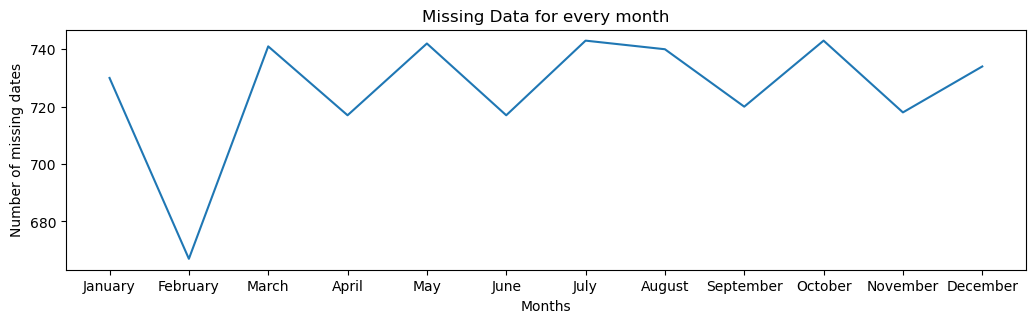

In [102]:
months = {'January': 0, 'February': 0, 'March': 0, 'April': 0, 
          'May': 0, 'June': 0, 'July': 0, 'August': 0, 
          'September': 0, 'October': 0, 'November': 0, 'December': 0}

for date in missing_dates:
    months[date.month_name()] = months[date.month_name()] + 1

Fig = plt.figure()
ax = Fig.add_axes([0.5, 0.5, 1.5, 0.5])
ax.plot(months.keys(), months.values())
ax.set_xlabel('Months')
ax.set_ylabel('Number of missing dates')
ax.set_title('Missing Data for every month')
plt.show()

In [103]:
#check min and max temperature 
min_temperature = weather_data["Temperature"].min()
print("Minium temperature:", min_temperature, "Fahrenheit")

max_temperature = weather_data["Temperature"].max()
print("Max temperature:", max_temperature, "Fahrenheit")

Minium temperature: -9 Fahrenheit
Max temperature: 101 Fahrenheit


In [104]:
#check min and max Wind Speed
min_Wind_Speed = weather_data["Wind Speed"].min()
print("Minium Wind Speed:", min_Wind_Speed, "mph")

max_Wind_Speed = weather_data["Wind Speed"].max()
print("Max Wind Speed:", max_Wind_Speed, "mph")

Minium Wind Speed: 0.0 mph
Max Wind Speed: 37.0 mph


### Fit Weather Data into 15min steps according Taxi Data and fill missing data

In [105]:
#fit data into minute steps of 00,15,30,45
index = 0
time = timedelta(minutes=15)
last_index = weather_data.last_valid_index()
fit_weather_data = pd.DataFrame({'date_time' : [], 'temperature' : [], 'wind_speed' : [], 'precip' : [], 'condition' : []})
current_date = datetime(2022, 1, 1, 0, 0, 0)
end_date = datetime(2023, 1, 1, 0, 0, 0)

#loops to calculate last fitting weather data entry to compute current step
while current_date < end_date:

    if last_index != index:
        next_index = index
        search = True

        while search:

          if next_index + 1 >= last_index:
             break
          
          while next_index + 1 not in weather_data.index:
            next_index += 1

          if weather_data.loc[next_index + 1, 'DateTime'] < current_date:
            next_index += 1
            index = next_index

          else:
             search = False
             break

    #new row with time, temperature, wind speed, precip, condition
    new_row = {'date_time' : current_date, 'temperature' : weather_data.loc[index, 'Temperature'], 'wind_speed' : weather_data.loc[index, 'Wind Speed'],
                'precip' : weather_data.loc[index, 'Precip'], 'condition' : weather_data.loc[index, 'Condition']}
    #add to new dataframe
    fit_weather_data.loc[len(fit_weather_data)] = new_row
    #next 15min date
    current_date += time

In [106]:
fit_weather_data

,date_time,temperature,wind_speed,precip,condition
0,2022-01-01 00:00:00,33,21.0,0.0,Light Snow / Windy
1,2022-01-01 00:15:00,33,21.0,0.0,Light Snow / Windy
2,2022-01-01 00:30:00,33,21.0,0.0,Light Snow / Windy
3,2022-01-01 00:45:00,33,21.0,0.0,Light Snow / Windy
4,2022-01-01 01:00:00,33,21.0,0.0,Light Snow / Windy
...,...,...,...,...,...
35035,2022-12-31 22:45:00,37,6.0,0.0,Cloudy
35036,2022-12-31 23:00:00,37,6.0,0.0,Cloudy
35037,2022-12-31 23:15:00,37,6.0,0.0,Cloudy
35038,2022-12-31 23:30:00,37,6.0,0.0,Cloudy


In [107]:
#export CSV Data 
fit_weather_data.to_csv('data\prepared\weather_data_2022.csv', index=False)